# Advanced Data Science Capstone Project - Leukemia Image Classification

BY Sayaka Minegishi
June 2021


## Use Case

This project will utilize the Leukemia Dataset uploaded to Kaggle by Nikhil Sharma to make an image classification program that classifies whether a patient has acute lymphoblastic leukemia, given an image of their bone marrow aspirate smear.

First, we will install the relevant packages

In [1]:
pip install opencv-python-headless

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --user --upgrade tensorflow

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Requirement already up-to-date: tensorflow in /home/wsuser/.local/lib/python3.7/site-packages (2.5.0)


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras==2.3.1

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


#### Load Data

We will now download the bone marrow aspirate smear images using IBM Cloud's object storage. The images are all contained in a single folder called 'input' (imported as input.zip), and training and validation sets have already been created for both leukemia-positive and leukemia-negative individuals. 20% of the data for each category has been used for validation. 

In [6]:
import shutil
import os

#delete the directories containing our image files if they are already present
if 'input' in os.listdir("./"):
    shutil.rmtree('input')

if 'input.zip' in os.listdir("./"):
    os.remove('input.zip')

In [7]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-62a11686-a522-45e1-9d33-be942e569d01',
    'IBM_API_KEY_ID': 'AyDmNB01z7kaQWR4dCKsn7kmKj5OQ1dQRsDhMpSid0zy',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'coursera-donotdelete-pr-axcazqc6bchxob',
    'FILE': 'input.zip'
}


In [8]:
from ibm_botocore.client import Config
import ibm_boto3

cos1 = ibm_boto3.client(service_name = 's3', 
                       ibm_api_key_id = credentials_1['IBM_API_KEY_ID'],
                       ibm_service_instance_id = credentials_1['IAM_SERVICE_ID'],
                       ibm_auth_endpoint = credentials_1['IBM_AUTH_ENDPOINT'],
                       config = Config(signature_version='oauth'),
                       endpoint_url = credentials_1['ENDPOINT'])

In [9]:
#download the zip file containing all files

cos1.download_file(Bucket = credentials_1['BUCKET'], Key = 'input.zip', Filename = 'input.zip')

In [10]:
#extract the contents of the ALL positive zip file
from zipfile import*
print('Extract all files in input.zip to the current directory')
with ZipFile('input.zip', 'r') as zipObj:
    zipObj.extractall() #extract the contents of the zip file

Extract all files in input.zip to the current directory


In [11]:

if '__MACOSX' in os.listdir("./"):
    shutil.rmtree("./__MACOSX")

In [12]:
#check the directory
os.listdir("./")

['input', '.virtual_documents', 'input.zip']


## Initial Data Exploration


First we will check what files are in our directory.

In [13]:
#check the leukemia-positive individuals in the training data set
os.listdir("./input/training/positive") #check that the files are in the directory

['Im042_1.jpg',
 'Im092_1.jpg',
 'Im054_1.jpg',
 'Im115_1.jpg',
 'Im130_1.jpg',
 'Im030_1.jpg',
 'Im037_1.jpg',
 'Im102_1.jpg',
 'Im222_1.jpg',
 'Im116_1.jpg',
 'Im066_1.jpg',
 'Im120_1.jpg',
 'Im035_1.jpg',
 'Im080_1.jpg',
 'Im224_1.jpg',
 'Im124_1.jpg',
 'Im223_1.jpg',
 'Im106_1.jpg',
 'Im097_1.jpg',
 'Im043_1.jpg',
 'Im076_1.jpg',
 'Im038_1.jpg',
 'Im067_1.jpg',
 'Im091_1.jpg',
 'Im118_1.jpg',
 'Im101_1.jpg',
 'Im033_1.jpg',
 'Im123_1.jpg',
 'Im128_1.jpg',
 'Im087_1.jpg',
 'Im119_1.jpg',
 'Im088_1.jpg',
 'Im107_1.jpg',
 'Im073_1.jpg',
 'Im041_1.jpg',
 '.DS_Store',
 'Im061_1.jpg',
 'Im089_1.jpg',
 'Im117_1.jpg',
 'Im032_1.jpg',
 'Im051_1.jpg',
 'Im062_1.jpg',
 'Im110_1.jpg',
 'Im063_1.jpg',
 'Im074_1.jpg',
 'Im082_1.jpg',
 'Im077_1.jpg',
 'Im046_1.jpg',
 'Im059_1.jpg',
 'Im085_1.jpg',
 'Im112_1.jpg',
 'Im069_1.jpg',
 'Im034_1.jpg',
 'Im109_1.jpg',
 'Im028_1.jpg',
 'Im079_1.jpg',
 'Im050_1.jpg',
 'Im090_1.jpg',
 'Im086_1.jpg',
 'Im127_1.jpg',
 'Im125_1.jpg',
 'Im095_1.jpg',
 'Im036_1.

In [14]:
#list of leukemia-negative individuals in the training set
print("Leukemia-negative individuals in training data set:")
print(os.listdir("./input/training/negative"))
print()

#list of leukemia-positive individuals in the validation set
print("list of leukemia-positive individuals in the validation set:")
print(os.listdir("./input/validation/positive"))
print()

#list of leukemia-negative individuals in the validation set
print("list of leukemia-negative individuals in the validation set:")
print(os.listdir("./input/validation/negative"))
print()

Leukemia-negative individuals in training data set:
['Im136_0.jpg', 'Im151_0.jpg', 'Im222_0.jpg', 'Im242_0.jpg', 'Im160_0.jpg', 'Im214_0.jpg', 'Im259_0.jpg', 'Im162_0.jpg', 'Im133_0.jpg', 'Im107_0.jpg', 'Im144_0.jpg', 'Im093_0.jpg', 'Im230_0.jpg', 'Im258_0.jpg', 'Im098_0.jpg', 'Im176_0.jpg', 'Im238_0.jpg', 'Im212_0.jpg', 'Im223_0.jpg', 'Im155_0.jpg', 'Im163_0.jpg', 'Im105_0.jpg', 'Im091_0.jpg', 'Im146_0.jpg', 'Im229_0.jpg', 'Im149_0.jpg', 'Im173_0.jpg', 'Im092_0.jpg', 'Im252_0.jpg', 'Im237_0.jpg', 'Im233_0.jpg', 'Im180_0.jpg', 'Im175_0.jpg', 'Im234_0.jpg', 'Im195_0.jpg', 'Im202_0.jpg', 'Im203_0.jpg', 'Im158_0.jpg', 'Im221_0.jpg', 'Im174_0.jpg', 'Im145_0.jpg', 'Im183_0.jpg', 'Im090_0.jpg', 'Im088_0.jpg', 'Im181_0.jpg', 'Im199_0.jpg', 'Im089_0.jpg', 'Im219_0.jpg', 'Im131_0.jpg', 'Im171_0.jpg', '.DS_Store', 'Im196_0.jpg', 'Im241_0.jpg', 'Im253_0.jpg', 'Im208_0.jpg', 'Im192_0.jpg', 'Im254_0.jpg', 'Im102_0.jpg', 'Im200_0.jpg', 'Im185_0.jpg', 'Im247_0.jpg', 'Im231_0.jpg', 'Im170_0.jpg', 'Im1

We notice that there is a non-image file called '.DS_Store' in the subdirectory containing leukemia-positive individuals in the training data set. We will need to get rid of this in the ETL stage.

In [15]:
#Check the number of observations in our data
print("The number of leukemia-positive images in our training set is: ", len(os.listdir("./input/training/positive")))
print("The number of leukemia-negative images in our training set is: ", len(os.listdir("./input/training/negative")))
print()
print("The number of leukemia-positive images in our validation set is: ", len(os.listdir("./input/validation/positive")))
print("The number of leukemia-negative images in our validation set is: ", len(os.listdir("./input/validation/negative")))



The number of leukemia-positive images in our training set is:  107
The number of leukemia-negative images in our training set is:  152

The number of leukemia-positive images in our validation set is:  27
The number of leukemia-negative images in our validation set is:  38


We will now check that the image files open properly:

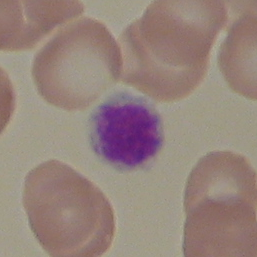

In [16]:
#examine a leukemia negative image at random from the training set
import PIL
from PIL import Image

ALL_negative_list = [] #make a list to store the image paths for leukemia-negative individuals

#append the file path to the array
for file in os.listdir("./input/training/negative"):
    file = "./input/training/negative/" + file
    ALL_negative_list.append(file)

#examine one of the images from leukemia negative individuals (the 6th image)
PIL.Image.open(ALL_negative_list[5], mode= 'r')

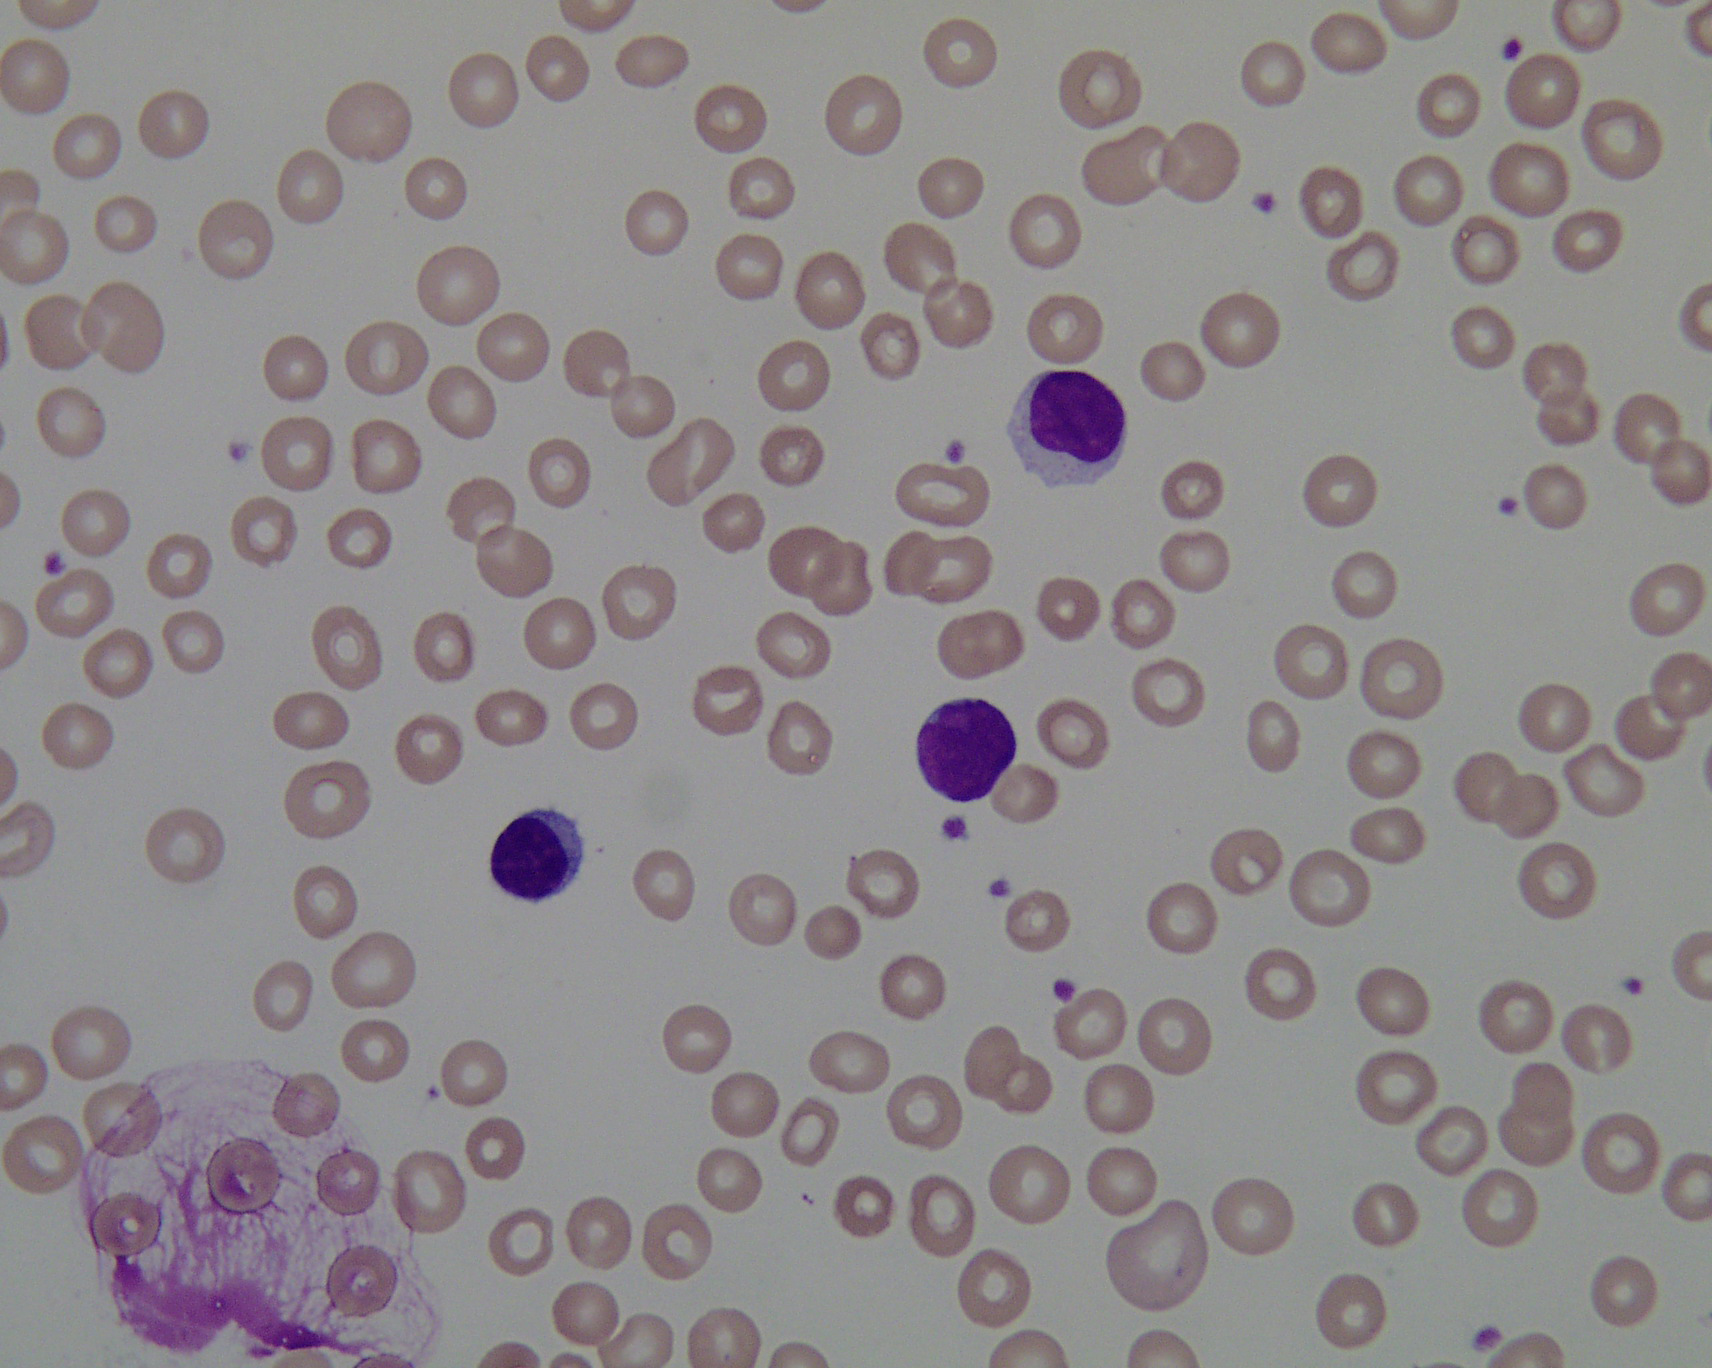

In [17]:
#examine a leukemia positive image at random from the training set

ALL_positive_list = []

for file in os.listdir("./input/training/positive"):
    file = "./input/training/positive/" + file
    ALL_positive_list.append(file)

#examine one of the images from leukemia negative individuals (the 6th image)
PIL.Image.open(ALL_positive_list[5], mode= 'r')

The images seem to appear normally.

### Summary for Initial Data Exploration

#### Quality issues
The dataset contains images of bone marrow aspirate smears from individuals, which depict their lumphocytes.

Originally, the dataset contained one file that was not an image file ('.DS_Store'). Since this program will be an image classification program, I will remove this unnecessary file from the final dataset. There were no missing values or wrong measurements and images in the training set showed properly. All the files are in the the JPEG format.

#### Feature Quality
Since my dataset is composed of images for classification, feature quality cannot be assessed by numerical measures. However, all images show bone marrow aspirate smears and are thus comparable and relevant to the program.

#### Value Distribution of Data
The training set contains 152 images from individuals who do not have acute lumphoblastic leukemia and 107 images from individuals who test positive for acute lymphoblastic leukemia. The validation set contains 27 images from leukemia-positive individuals and 38 images from leukemia-neagtive individuals. 

The graph visualizing this distribution of data in the training and validation sets is shown below:

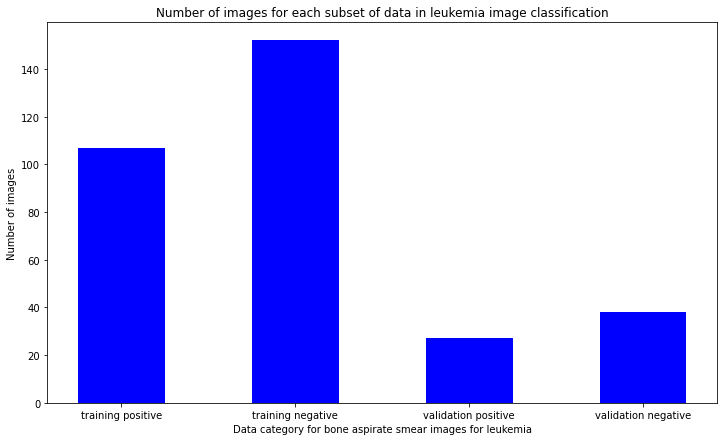

In [18]:
#visualization
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (12, 7))
#x values (the categories)
x = ['training positive', 'training negative', 'validation positive', 'validation negative']

#y values
y = [107, 152, 27, 38]

#create a bar plot comparing the number of images in each file
plt.bar(x, y, color = 'blue', width = 0.5)

#define the labels and the title
plt.xlabel("Data category for bone aspirate smear images for leukemia")
plt.ylabel("Number of images")
plt.title("Number of images for each subset of data in leukemia image classification")

plt.show()

## Extract, Transform, Load (ETL)

We remove the '.DS_Store' file from each directory

In [19]:
#clean data by removing 'DS_Store' file from each directory

for entryname in os.listdir('./input/training/positive'):
    if (entryname == '.DS_Store'):
        os.remove('./input/training/positive/.DS_Store')
        
for entryname in os.listdir('./input/training/negative'):
    if (entryname == '.DS_Store'):
        os.remove('./input/training/negative/.DS_Store')
        
for entryname in os.listdir('./input/validation/positive'):
    if (entryname == '.DS_Store'):
        os.remove('./input/validation/positive/.DS_Store')

for entryname in os.listdir('./input/validation/negative'):
    if (entryname == '.DS_Store'):
        os.remove('./input/training/positive/.DS_Store')


### Data Cleansing
We now check that there are no duplicate images in our dataset

In [20]:
#For validation and training data, check that there are no duplicates in images from either the leukemia-positive or leukemia-negative lists
#by comparing the length of each list to the number of unique entries.

#check duplicates for leukemia-positive images in the training set

if len(os.listdir("./input/training/positive")) != len(set(os.listdir("./input/training/positive"))):
    print("Duplicate images present in leukemia-positive images in the training set.")
else:
    print("No duplicate images present in leukemia-positive images in the training set.")

print()

#check duplicates for leukemia-negative images in the training set

if len(os.listdir("./input/training/negative")) != len(set(os.listdir("./input/training/negative"))):
    print("Duplicate images present in leukemia-negative images in the training set.")
else:
    print("No duplicate images present in leukemia-negative images in the training set.")

print()

#check duplicates for leukemia-positive images in the validation set

if len(os.listdir("./input/validation/positive")) != len(set(os.listdir("./input/validation/positive"))):
    print("Duplicate images present in leukemia-positive images in the validation set.")
else:
    print("No duplicate images present in leukemia-positive images in the validation set.")
print()

#check duplicates for leukemia-negative images in the validation set

if len(os.listdir("./input/validation/negative")) != len(set(os.listdir("./input/validation/negative"))):
    print("Duplicate images present in leukemia-negative images in the validation set.")
else:
    print("No duplicate images present in leukemia-negative images in the validation set.")

print()


No duplicate images present in leukemia-positive images in the training set.

No duplicate images present in leukemia-negative images in the training set.

No duplicate images present in leukemia-positive images in the validation set.

No duplicate images present in leukemia-negative images in the validation set.



Every image in the dataset is unique, as checked in the above cell.

## Feature Engineering

In [21]:
import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf

import cv2



Our first step in feature engineering is making a numpy array that can store the image in an array form and its corresponding label (positive or negative for leukemia) in integer form. We will make two of such arrays: one for our training data and one for our validation data. We will first define a function called make_data_array() that can do this job.

In [22]:
labels = ['positive', 'negative'] #define the classes
img_size = 224
data_directory = "./"

#create a function to get our data

def make_data_array(data_directory):
    data = [] #create an empty (2D) array to store our data with the image in an array and its label 
    for label in labels:
        path = os.path.join(data_directory, label) #get the path to the directory that contains the images from that specific category
        class_number = labels.index(label) #assign a number to the labels and store this as class_number
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert the image to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size))#reshape the images
                data.append([resized_arr, class_number])
            except Exception as e:
                print(e)
        return np.array(data, dtype = object)
            

    

We will now pass in the directory paths for our training and validation data to the make_data_array function, so that for validation and training data separately we can create an array that contains each image in an array form and its label.

In [23]:
#define our training and validation data arrays that has the image (as an array) and its category as one array
training_data = make_data_array('./input/training')
validation_data = make_data_array('./input/validation')

In [24]:
#check how the array for our training data looks:
training_data

array([[array([[[156, 150, 148],
        [158, 153, 149],
        [160, 154, 150],
        ...,
        [156, 156, 157],
        [155, 155, 157],
        [155, 154, 159]],

       [[159, 153, 153],
        [157, 149, 147],
        [156, 149, 147],
        ...,
        [156, 156, 156],
        [155, 155, 157],
        [154, 154, 158]],

       [[158, 152, 152],
        [157, 149, 150],
        [154, 147, 148],
        ...,
        [155, 155, 154],
        [156, 156, 156],
        [157, 157, 158]],

       ...,

       [[154, 150, 139],
        [154, 155, 141],
        [153, 155, 143],
        ...,
        [128, 127, 143],
        [126, 128, 144],
        [123, 125, 142]],

       [[152, 152, 137],
        [154, 155, 141],
        [153, 153, 142],
        ...,
        [129, 128, 142],
        [128, 127, 141],
        [123, 121, 138]],

       [[151, 153, 139],
        [153, 153, 140],
        [156, 153, 146],
        ...,
        [132, 129, 143],
        [131, 127, 141],
        [129, 12

We will now store the image arrays and their labels for each class (validation and training data) in separate arrays: x_train, y_train, x_val and y_val. 

In [25]:
#data processing 

#define the empty arrays that we will use to store the categories (positive or negative, in integers) and the images in its array form, for training and validation data separately.
x_train = []
y_train = []
x_val = []
y_val = []

#store the image and its corresponding label in x_train and y_train respectively, for each image in the training data set
for image, label in training_data:
  x_train.append(image)
  y_train.append(label)

#store the image and its corresponding label in x_val and y_val respectively, for each image in the validation data set.
for image, label in validation_data:
  x_val.append(image)
  y_val.append(label)



## Model Definition - with Deep Learning


We will define a Sequential model with 10 layers. The input shape will be 224 by 224, and is colored. We begin by normalizing our data.

In [26]:
# Normalize the data so that all images will have the same size.
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [27]:
#model definition
num_classes = 2 #there are 2 classes: one for positive and one for negative

model = Sequential()
model.add(Conv2D(16,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(16, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(num_classes))


We will now compile our model using the 'Adam' optimizer.

In [28]:
#compile our model
model.compile(optimizer = 'Adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics = ['accuracy'])

Here is the summary of our model. We have 6,434,962 parameters in total in our model, and all of them can be trained.

In [29]:
model.summary() #see what we have in our model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

## Model Training - with Deep Learning

We will now train our model

In [30]:
epochs = 12
batch_size = 32
history = model.fit(x_train,y_train, batch_size= batch_size, epochs = epochs , validation_data = (x_val, y_val)) #train model

Epoch 1/12
4/4 [==============================] - 22s 1s/step - loss: 0.3856 - accuracy: 0.5430 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/12
4/4 [==============================] - 4s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/12
4/4 [==============================] - 4s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/12
4/4 [==============================] - 4s 992ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/12
4/4 [==============================] - 4s 986ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/12
4/4 [==============================] - 4s 930ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/12
4/4 [==============================] - 4s 947ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00

## Model Definition - with Supervised Model

In [31]:
import pandas as pd
from skimage.transform import resize
from skimage.io import imread

image_data_flattened =[] #input array
target_array = [] #output array
data_directory_training = "./input/training"

for i in labels:
    path_training = os.path.join(data_directory_training, i)
    for img in os.listdir(path_training):
        img_array = imread(os.path.join(path_training, img))
        img_resized = resize(img_array, (224,224,3)) #resize input image
        image_data_flattened.append(img_resized.flatten()) #flatten image
        target_array.append(labels.index(i))
    print(f'loaded category: {i} successfully')

flattened_data = np.array(image_data_flattened)
target_data = np.array(target_array)

df = pd.DataFrame(flattened_data)
df['Target'] = target_data #add column for target (the labels)
x_train_supervised = df.iloc[:,:-1] #input
y_train_supervised = df.iloc[:,-1] #output

loaded category: positive successfully
loaded category: negative successfully


In [32]:
#validation data
image_data_flattened_v =[] #input array
target_array_v = [] #output array
data_dir_validation = "./input/validation"

for i in labels:
    path_validation = os.path.join(data_dir_validation, i)
    for img in os.listdir(path_validation):
        img_array = imread(os.path.join(path_validation, img))
        img_resized = resize(img_array, (224,224,3)) #resize input image
        image_data_flattened_v.append(img_resized.flatten()) #flatten image
        target_array_v.append(labels.index(i))
    print(f'loaded category: {i} successfully')

flattened_data_v = np.array(image_data_flattened_v)
target_data_v = np.array(target_array_v)

df_v = pd.DataFrame(flattened_data_v)
df_v['Target'] = target_data_v #add column for target (the labels)
x_val_supervised = df_v.iloc[:,:-1] #input
y_val_supervised = df_v.iloc[:,-1] #output

loaded category: positive successfully
loaded category: negative successfully


In [33]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear') #initialize a SVM classifier model


## Model Training - with non-deep learning model

In [34]:
clf = clf.fit(x_train_supervised, y_train_supervised)


In [35]:
#test the supervised model
y_predicted =clf.predict(x_val_supervised)
print("The predicted Data is :")
print(y_predicted)
print("The actual data is:")
print(np.array(y_val_supervised))



The predicted Data is :
[0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1]
The actual data is:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Model Evaluation 

### With Deep Learning Model
we will evaluate the performance of our deep learning model using accuracy score.

In [36]:
score = model.evaluate(x_val, y_val, verbose = 0) #evaluate the model on the validation data
print("accuracy: ", score[1]) #get the accuracy of the model

accuracy:  1.0


### With non-deep learning model (SVM)

We will evaluate the performance of our image classification model built using SVM with f1 score and accuracy.

In [37]:
from sklearn.metrics import f1_score
f1 = f1_score(y_val_supervised, y_predicted, average = 'weighted')
print("The F1 score for our SVM model is ", f1)

The F1 score for our SVM model is  0.5820567492209283


In [38]:
from  sklearn.metrics import accuracy_score
#evaluate the SVM model with accuracy score
accuracyscore = accuracy_score(y_val_supervised, y_predicted)

print("Our model has the accuracy score of ", accuracyscore )


Our model has the accuracy score of  0.5846153846153846


## Model Deployment
We will deploy our model as a pdf file of this Jupyter notebook. To do this, we will first download this notebook as a HTML file from the 'File' -> 'Download as' option, open the HTML file, and save the file as pdf. 


## Bibliography



Chris. 2020. “Creating a Simple Binary SVM Classifier with Python and Scikit-Learn.” May 3, 2020. https://www.machinecurve.com/index.php/2020/05/03/creating-a-simple-binary-svm-classifier-with-python-and-scikit-learn/.

Gautam, Tanishq. 2020. “Create Your Own Image Classification Model Using Python and Keras.” October 16, 2020. https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/.

GeeksforGeeks. 2021. “Bar Plot in Matplotlib - GeeksforGeeks.” 2020. March 4, 2021. https://www.geeksforgeeks.org/bar-plot-in-matplotlib/.

Shanmukh, Vegi. 2021. “Image Classification Using Machine Learning-Support Vector machine(SVM).” Analytics Vidhya. March 3, 2021. https://medium.com/analytics-vidhya/image-classification-using-machine-learning-support-vector-machine-svm-dc7a0ec92e01.

Zhang, Kessie. 2020. “How to Convert Jupyter Notebooks into PDFs - towards Data Science.” Towards Data Science. August 21, 2020. https://towardsdatascience.com/how-to-convert-jupyter-notebooks-into-pdf-5accaef3758.
